In [1]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt
import torch

In [8]:
def load_reward(path):
    files_name = os.listdir(path)
    files_name.remove('model_parameters.txt')
    models = list(filter(lambda n: "model" in n,  files_name))
    if len(models)==1:
        load_path = os.path.join(path, 'model.pt')
    else: 
        temp = np.array([int(name.replace('model_','').replace('.pt','')) for name in iter(models)])
        load_path = os.path.join(path, 'model_'+str(max(temp))+'.pt')
        
    ckpt = torch.load(load_path)
    
    return ckpt['avg_reward'], ckpt['std_reward'], ckpt['enc_losses']

def time_to_cv(r):
    temp = np.where(r>(-200))[0]
    if len(temp)==0:
        return len(r)
    else: 
        return temp[0]

In [9]:
param = []
r_mean = []
r_std = []
enc_loss = []
for d in filter(lambda x:'Pendulum' in x,os.listdir(os.getcwd())):
    if os.path.exists(os.path.join(d,"model_parameters.txt")):
        with open(os.path.join(d,'model_parameters.txt')) as f:
            param.append(json.loads(f.read()))
        r_mean_, r_std_, enc_loss_ = load_reward(d)
        param[-1]['r_mean'] = np.array(r_mean_)
        param[-1]['r_std'] = np.array(r_std_)
        param[-1]['enc_loss'] = np.array(enc_loss_)
        
data = pd.DataFrame.from_dict(param)
data['name'] = [i.split('/')[-1] for i in data['save_dir']]

In [10]:
pd.set_option('display.max_columns', None)
data

,mode,env,first_seed,n_seeds,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,use_belief,stoch_mdp_param,stoch_mdp_distrib,steps_per_epoch,epochs,max_ep_len,gamma,delta,save_period,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,epochs_belief_training,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,seed,r_mean,r_std,enc_loss,name
0,train,Pendulum-v0,0,3,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,0,"[-1639.3353310152202, -1447.3795752294272, -15...","[420.43790481186807, 356.414356717437, 359.760...","[4.3581318855285645, 4.492414951324463, 4.4183...",delay_15_deter_belief
1,train,Pendulum-v0,0,3,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,1,"[-1546.9467094415693, -1679.7643261257458, -15...","[302.6495185288671, 387.05355292722436, 345.80...","[4.564670085906982, 4.427098274230957, 4.43580...",delay_15_deter_belief
2,train,Pendulum-v0,0,3,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,2,"[-1555.5262123602256, -1506.5682625197674, -15...","[380.64582046153527, 356.5692255660399, 357.99...","[4.559415817260742, 4.505350112915039, 4.40713...",delay_15_deter_belief
3,train,Pendulum-v0,3,7,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,3,"[-1631.0595681926952, -1600.1263565948345, -15...","[362.62107850055145, 388.2071030417968, 351.44...","[4.44799280166626, 4.346042633056641, 4.305793...",delay_15_deter_belief
4,train,Pendulum-v0,3,7,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,4,"[-1577.587538675632, -1551.7578035820952, -148...","[307.59414338655847, 351.78958516449825, 327.4...","[4.5367112159729, 4.520046234130859, 4.5110125...",delay_15_deter_belief
5,train,Pendulum-v0,3,7,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,5,"[-1515.8301711884737, -1525.1055756658961, -15...","[378.3033600092554, 370.8242850023329, 409.159...","[4.5710248947143555, 4.494677543640137, 4.4024...",delay_15_deter_belief
6,train,Pendulum-v0,3,7,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200,10000,2,100000,10000,0.01,0.01,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/delay_15_deter_belief,6,"[-1609.46924843689, -1515.3756606612556, -1558...","[457.2392802876383, 424.6795354278771, 363.222...","[4.537973880767822, 4.513304233551025, 4.48062...",delay_15_deter_belief
7,train,Pendulum-v0,3,7,15,False,50,0.7,False,True,1,Gaussian,5000,2000,250,0

In [11]:
print('Different columns: \n')
for c in data.columns:
    a = data[c].values
    if not (a[0] == a).all():
        print('\t -  '+c+'\n')

Different columns: 

	 -  first_seed

	 -  n_seeds

	 -  seed



C:\Users\pierr\Anaconda3\envs\dmdp\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


AttributeError: 'bool' object has no attribute 'all'

In [12]:
for i, r in enumerate(data['r_mean']):
    m = np.argmax(r)
    print('{0:<40} - Max mean reward {1:<20} -  at epoch {2}'.format(data['name'][i],r[m],m))
    
data['max_mean_r'] = [max(r) for r in data['r_mean']]
data['cv_speed'] = [time_to_cv(r) for r in data['r_mean']]

delay_15_deter_belief                    - Max mean reward -878.8598148145885   -  at epoch 1959
delay_15_deter_belief                    - Max mean reward -863.3205935972144   -  at epoch 1695
delay_15_deter_belief                    - Max mean reward -843.4077264925235   -  at epoch 1668
delay_15_deter_belief                    - Max mean reward -843.8608595100975   -  at epoch 1944
delay_15_deter_belief                    - Max mean reward -864.5055213328044   -  at epoch 1970
delay_15_deter_belief                    - Max mean reward -858.658970925272    -  at epoch 1874
delay_15_deter_belief                    - Max mean reward -818.9612184523506   -  at epoch 1992
delay_15_deter_belief                    - Max mean reward -886.214388211052    -  at epoch 1931
delay_15_deter_belief                    - Max mean reward -876.2551408309179   -  at epoch 1888
delay_15_deter_belief                    - Max mean reward -848.6902243835012   -  at epoch 1973


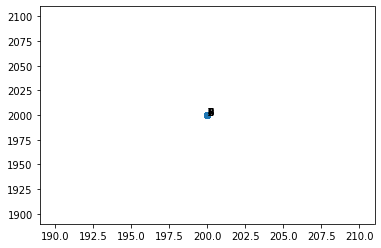

In [13]:
fig, ax = plt.subplots()
plt.scatter(data['epochs_belief_training'], data['cv_speed'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs_belief_training'][i], data['cv_speed'][i]))

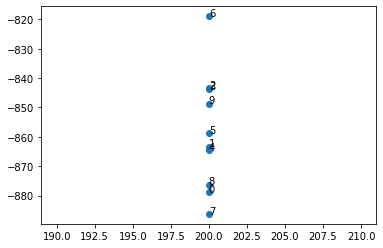

In [14]:
fig, ax = plt.subplots()
plt.scatter(data['epochs_belief_training'], data['max_mean_r'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs_belief_training'][i], data['max_mean_r'][i]))

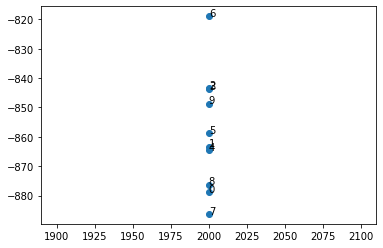

In [15]:
fig, ax = plt.subplots()
plt.scatter(data['epochs'], data['max_mean_r'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs'][i], data['max_mean_r'][i]))

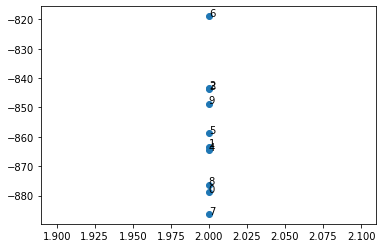

In [16]:
fig, ax = plt.subplots()
plt.scatter(data['train_enc_iters'], data['max_mean_r'])
for i in range(len(data)):
    ax.annotate(i, (data['train_enc_iters'][i], data['max_mean_r'][i]))